### Created by: Mrunal Bokil
#### Dataset used: Graduate admissions dataset (https://www.kaggle.com/mohansacharya/graduate-admissions)

What am I going to perform on this dataset?

    1. Convert categorical variables to ordinary
    2. Correlation matrix
    3. Descriptive statistics
    4. VIF
    5. Use 6-7 prediction algorithms to predict if student would get admission
      - linear regrresion, randomforest, decision tree, xgboost, support vector regressor 
    6. k-fold cross validation and accuracy measurement (maybe anova)

### Import libraries and load data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import preprocessing

In [3]:
grad_file = pd.read_csv("C:/Users/mruna/Desktop/Interview prep/Modeling_exercise_2/Admission_Predict.csv")
grad_file.head()
grad_file.shape

(400, 9)

### Get correlation plot

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.835977           0.668976  0.612831   
TOEFL Score         0.835977     1.000000           0.695590  0.657981   
University Rating   0.668976     0.695590           1.000000  0.734523   
SOP                 0.612831     0.657981           0.734523  1.000000   
LOR                 0.557555     0.567721           0.660123  0.729593   
CGPA                0.833060     0.828417           0.746479  0.718144   
Research            0.580391     0.489858           0.447783  0.444029   
Chance of Admit     0.802610     0.791594           0.711250  0.675732   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.557555  0.833060  0.580391          0.802610  
TOEFL Score        0.567721  0.828417  0.489858          0.791594  
University Rating  0.660123  0.746479  0.447783          0.711250  
SOP                0.729593  0.718144  0.444029          0.67

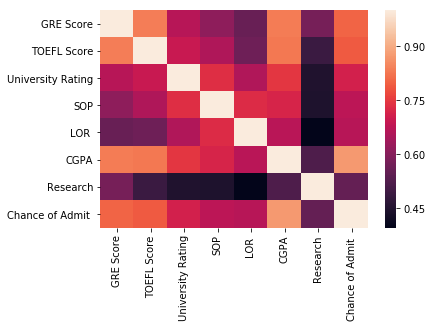

In [4]:
grad_file_corr = grad_file.drop('Serial No.', 1).corr()
print(grad_file_corr)
sns.heatmap(grad_file_corr, xticklabels = grad_file_corr.columns, yticklabels = grad_file_corr.columns)
plt.show()

### Get histogram plot for GRE scores

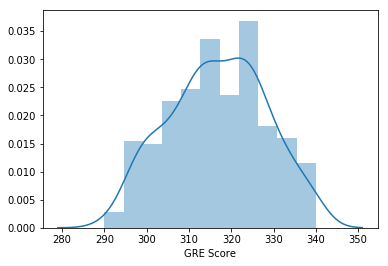

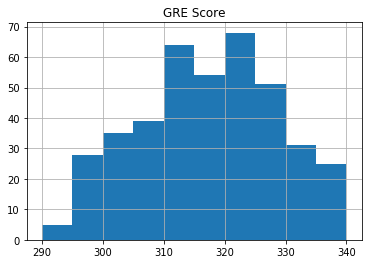

In [5]:
# histogram for gre scores to see what is average GRE score across the data
#grad_file.columns
sns.distplot(grad_file['GRE Score'])
plt.show()

grad_file.hist(column = 'GRE Score')
plt.show()

In [6]:
grad_file.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
#grad_file[grad_file.columns[0]]
#X = grad_file[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA', 'Research']]

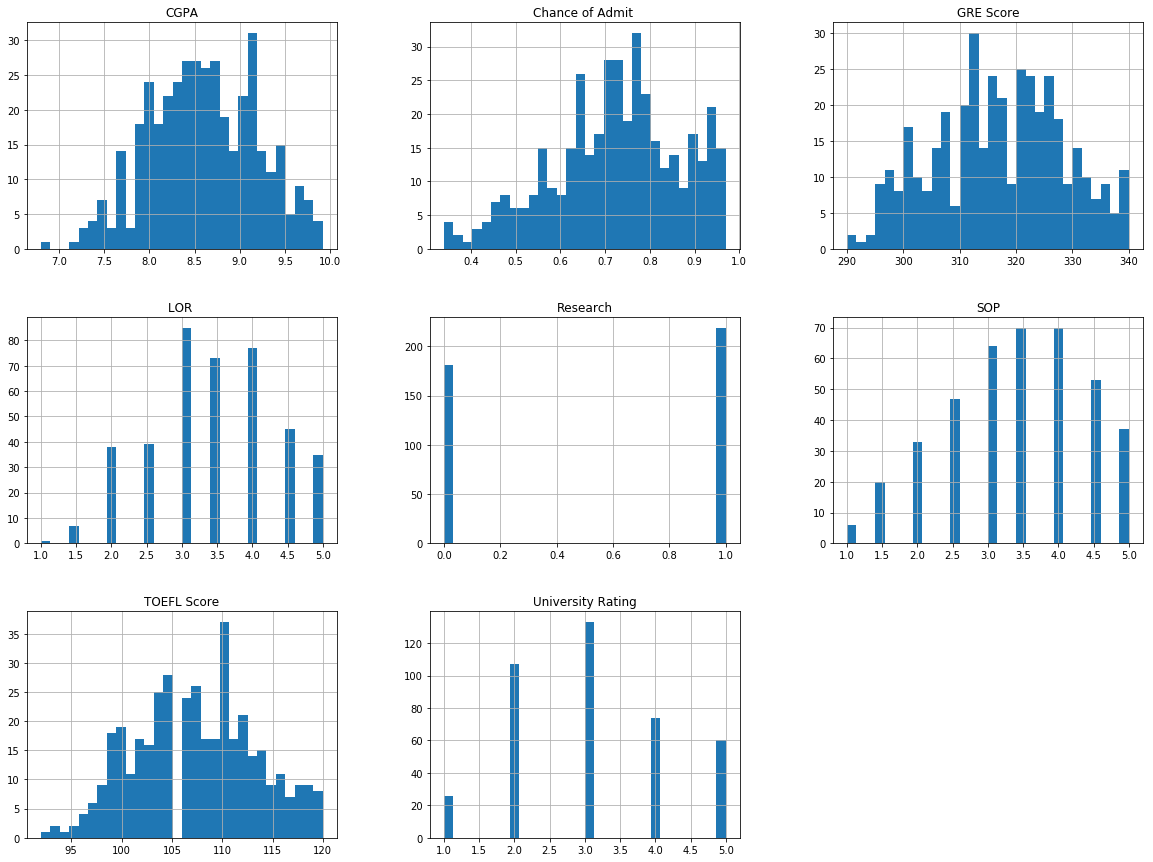

In [8]:
grad_file.drop('Serial No.', 1).hist(bins = 30, figsize=(20,15))
plt.show()

In [9]:
#all_input_var = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "CGPA", "Research"]
#grad_file[all_input_var].shape
#grad_file[all_input_var].columns

### Calculate the VIF

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

all_input_var = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "CGPA", "Research"]
vif = pd.DataFrame()
vif["features"] = grad_file[all_input_var].columns
vif["vif_score"] = [variance_inflation_factor(grad_file[all_input_var].values, i) for i in range(grad_file[all_input_var].shape[1])]
vif

,features,vif_score
0,GRE Score,1436.417266
1,TOEFL Score,1343.763370
2,University Rating,21.499440
3,SOP,31.870699
4,CGPA,1035.520076
5,Research,2.857031


### Scale the data and calculate one-way ANOVA to see if there is differnce between the means

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(grad_file)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = ['Serial No.', 'GRE Score','TOEFL Score','University Rating', 'SOP', 'LOR','CGPA','Research','Chance_admit']
#df_normalized.head()
stats.f_oneway(df_normalized['GRE Score'], df_normalized['TOEFL Score'])

F_onewayResult(statistic=0.8102371232057632, pvalue=0.36832170580605217)

### Convert binary Research variable using get dummies

In [12]:
grad_file.head()
#X = grad_file[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA', 'Research']]
# new X

X = grad_file[['GRE Score', 'SOP','Research']]

Y = grad_file[grad_file.columns[8]]
Y.rename(columns = {'Chance of Admit':'admit_score'}, inplace = True)
rsrch = pd.get_dummies(grad_file.Research, prefix = 'rsrch')
X = pd.concat([X, rsrch], axis=1)
drops = ['Research']
X.drop(drops, inplace=True, axis=1)
X.head()

,GRE Score,SOP,rsrch_0,rsrch_1
0,337,4.5,0,1
1,324,4.0,0,1
2,316,3.0,0,1
3,322,3.5,0,1
4,314,2.0,1,0


In [89]:
# recursive feature elimination

from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn import datasets
dataset = datasets.load_iris()

linreg = LinearRegression()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(linreg, 4)
rfe = rfe.fit(grad_file[['GRE Score', 'University Rating', 'SOP', 'CGPA', 'Research']], Y)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True  True]
[2 1 1 1 1]


In [30]:
Y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
dtype: float64

### Split the data to training and testing and run prediction algorithms

In [14]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

C:\Users\mruna\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Linear regression

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared: %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared: 0.6257


In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 0.0803


In [65]:
# using lasso regression 

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)

train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)

coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)
#lasso001 = Lasso(alpha=0.01, max_iter=10e5)
#lasso001.fit(X_train,y_train)

training score: 0.35146433200362415
test score:  0.30024706797027656
number of features used:  1


In [79]:
# alpha = 0.01
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)

coeff_used001 = np.sum(lasso001.coef_!=0)

print("training score for alpha=0.01:", train_score001) 
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)

# alpha = 0.0001
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)

coeff_used00001 = np.sum(lasso00001.coef_!=0)

print("training score for alpha=0.0001:", train_score00001) 
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)


# alpha = 0.05
# lasso00001 = Lasso(alpha=0.05, max_iter=10e5)
# lasso00001.fit(X_train,y_train)

# train_score00001=lasso00001.score(X_train,y_train)
# test_score00001=lasso00001.score(X_test,y_test)

# coeff_used00001 = np.sum(lasso00001.coef_!=0)

# print("training score for alpha=0.05:", train_score00001) 
# print("test score for alpha =0.05: ", test_score00001)
# print("number of features used: for alpha =0.05:", coeff_used00001)

# alpha = 0.000001
# lasso00001 = Lasso(alpha=0.000001, max_iter=10e5)
# lasso00001.fit(X_train,y_train)

# train_score00001=lasso00001.score(X_train,y_train)
# test_score00001=lasso00001.score(X_test,y_test)

# coeff_used00001 = np.sum(lasso00001.coef_!=0)

# print("training score for alpha=0.000001:", train_score00001) 
# print("test score for alpha =0.000001: ", test_score00001)
# print("number of features used: for alpha =0.000001:", coeff_used00001)

y_pred = lasso00001.predict(X_test)
print('Linear Regression R squared: %.4f' % lasso00001.score(X_test, y_test))

import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

training score for alpha=0.01: 0.7191093624288108
test score for alpha =0.01:  0.6031752533371195
number of features used: for alpha =0.01: 2
training score for alpha=0.0001: 0.7302568463852109
test score for alpha =0.0001:  0.6256248809751128
number of features used: for alpha =0.0001: 4
Linear Regression R squared: 0.6256
Linear Regression RMSE: 0.0803


### Random forest regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [26]:
y_pred = forest_reg.predict(X_test)
print('Linear Regression R squared: %.4f' % forest_reg.score(X_test, y_test))

Linear Regression R squared: 0.5869


In [25]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 0.0843


### Random forest with Grid Search CV

In [44]:
#from sklearn.grid_search import GridSearchCV
#from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

grid_1 = { 'bootstrap': [True],
           'max_depth': [80, 90, 100, 110],
        'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
   'min_samples_split': [8, 10, 12],
        'n_estimators': [100, 200, 300, 1000]
           }
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid = grid_1, n_jobs=-1, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
grid_search.best_score_

0.7256789643706268

In [46]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [62]:
rfreg1 = RandomForestRegressor(bootstrap= True, max_depth= 100, max_features= 2, min_samples_leaf= 3, min_samples_split= 10,
                               n_estimators= 100)
rfreg1.fit(X_train, y_train)


y_pred = rfreg1.predict(X_test)
print('Linear Regression R squared: %.4f' % rfreg1.score(X_test, y_test))

y_pred = rfreg1.predict(X_test)
rfreg1_mse = mean_squared_error(y_pred, y_test)
rfreg1_rmse = np.sqrt(rfreg1_mse)
print('Random Forest RMSE: %.4f' % rfreg1_rmse)

Linear Regression R squared: 0.6453
Random Forest RMSE: 0.0781


### Gradient Boosted regressor

In [18]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [19]:
print('Gradient Boosting R squared: %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared: 0.6281


In [20]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 0.0800


### Feature importances

In [27]:
feature_labels = np.array(['GRE Score','SOP', 'rsrch0', 'rsrch1'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

rsrch1-1.79%
rsrch0-1.98%
SOP-12.56%
GRE Score-83.66%


### Decision Tree Regressor

In [21]:
from sklearn import tree 
from sklearn.tree import DecisionTreeRegressor
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [22]:
print('Decision tree R squared: %.4f' % model.score(X_test, y_test))

Decision tree R squared: 0.3067


In [23]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Decision Tree RMSE: %.4f' % model_rmse)

Decision Tree RMSE: 0.1092


## Thank you!